## **미국의 주거용 건물 에너지 소비 데이터**
> **KWH** (Kilowatt-hour) 건물이나 시설의 전기 사용량

In [1]:
import pandas as pd

# 데이터 불러오기
u_df = pd.read_csv("./datasets/USA Residential Building Energy Consumption.csv")
u_df

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
0,10001,4,10,METRO,U,2,0,0,0,-2,...,0,103.32,1,0,137.45,-2,-2,91.33,-2,-2
1,10002,3,7,NONE,R,2,0,0,0,-2,...,1,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2
2,10003,3,6,METRO,U,2,0,1,0,1,...,0,100.14,1,0,137.45,-2,-2,91.33,-2,-2
3,10004,2,4,MICRO,C,2,0,1,0,1,...,0,NaN,-2,-2,137.45,-2,-2,91.33,2,0
4,10005,1,2,METRO,U,2,0,1,0,0,...,0,102.83,1,0,137.45,-2,-2,91.33,-2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681,15682,2,3,METRO,U,5,0,-2,-2,-2,...,1,102.40,5,1,137.45,-2,-2,91.33,-2,-2
5682,15683,3,6,MICRO,C,2,0,0,0,-2,...,0,99.34,1,0,137.45,-2,-2,91.33,-2,-2
5683,15684,2,3,METRO,U,5,0,-2,-2,-2,...,0,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2
5684,15685,3,7,METRO,R,2,0,0,0,-2,...,0,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2


In [2]:
# 중복행 검사
u_df.duplicated().sum().sum()

0

In [3]:
# 결측치 검사
u_df.isnull().sum().sum()

2382

In [4]:
# 결측치 삭제하기
columns = u_df.columns[u_df.isna().any()]

for column in columns:
    pre_u_df = u_df[~u_df[column].isna()]

pre_u_df.isna().sum().sum()

0

### **📊1Cycle**

In [5]:
# 인덱스 컬럼 제거하기
pre_u_df = pre_u_df.drop(labels=['DOEID'], axis=1).reset_index(drop=True)
pre_u_df

,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
0,4,10,METRO,U,2,0,0,0,-2,-2,...,0,103.32,1,0,137.45,-2,-2,91.33,-2,-2
1,3,6,METRO,U,2,0,1,0,1,0,...,0,100.14,1,0,137.45,-2,-2,91.33,-2,-2
2,1,2,METRO,U,2,0,1,0,0,0,...,0,102.83,1,0,137.45,-2,-2,91.33,-2,-2
3,3,5,METRO,U,4,0,-2,-2,-2,-2,...,0,102.79,1,0,137.45,-2,-2,91.33,-2,-2
4,2,3,METRO,R,2,0,1,0,1,0,...,0,101.53,1,0,137.45,-2,-2,91.33,-2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,1,2,METRO,U,2,0,1,0,1,0,...,0,98.69,1,0,137.45,-2,-2,91.33,-2,-2
3300,4,8,MICRO,C,2,0,1,0,1,0,...,0,89.69,1,0,137.45,-2,-2,91.33,-2,-2
3301,2,3,METRO,U,2,0,0,0,-2,-2,...,0,100.23,1,0,137.45,-2,-2,91.33,-2,-2
3302,2,3,METRO,U,5,0,-2,-2,-2,-2,...,1,102.40,5,1,137.45,-2,-2,91.33,-2,-2


In [6]:
# pre_u_df의 모든 컬럼을 확인하며 문자열이 있는지 여부를 출력
for column in pre_u_df.columns:
    if pre_u_df[column].dtype == 'object':
        if pre_u_df[column].str.contains('[a-zA-Z]').any():
            print(f"{column}")

METROMICRO
UATYP10
CLIMATE_REGION_PUB
IECC_CLIMATE_PUB


In [7]:
# 문자열 컬럼 확인하기
pre_u_df['METROMICRO'].value_counts()

METROMICRO
METRO    2959
MICRO     245
NONE      100
Name: count, dtype: int64

In [8]:
pre_u_df['UATYP10'].value_counts()

UATYP10
U    2678
C     362
R     264
Name: count, dtype: int64

In [9]:
pre_u_df['CLIMATE_REGION_PUB'].value_counts()

CLIMATE_REGION_PUB
Cold/Very Cold       1360
Mixed-Humid           762
Hot-Dry/Mixed-Dry     617
Hot-Humid             326
Marine                239
Name: count, dtype: int64

In [10]:
pre_u_df['IECC_CLIMATE_PUB'].value_counts()

IECC_CLIMATE_PUB
5A               877
3B-4B            570
4A               540
3A               291
1A-2A            257
5B-5C            231
6A-6B            217
3C               183
4C                56
2B                47
7A-7B-7AK-8AK     35
Name: count, dtype: int64

In [11]:
# 문자열 데이터를 제외한 컬럼 생성
pre_u2_df = pre_u_df.drop(labels=['METROMICRO', 'UATYP10', 'CLIMATE_REGION_PUB', 'IECC_CLIMATE_PUB'], axis=1).reset_index(drop=True)
pre_u2_df

,REGIONC,DIVISION,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,ATTIC,ZATTIC,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
0,4,10,2,0,0,0,-2,-2,0,0,...,0,103.32,1,0,137.45,-2,-2,91.33,-2,-2
1,3,6,2,0,1,0,1,0,0,0,...,0,100.14,1,0,137.45,-2,-2,91.33,-2,-2
2,1,2,2,0,1,0,0,0,1,0,...,0,102.83,1,0,137.45,-2,-2,91.33,-2,-2
3,3,5,4,0,-2,-2,-2,-2,-2,-2,...,0,102.79,1,0,137.45,-2,-2,91.33,-2,-2
4,2,3,2,0,1,0,1,0,1,0,...,0,101.53,1,0,137.45,-2,-2,91.33,-2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,1,2,2,0,1,0,1,0,1,0,...,0,98.69,1,0,137.45,-2,-2,91.33,-2,-2
3300,4,8,2,0,1,0,1,0,1,0,...,0,89.69,1,0,137.45,-2,-2,91.33,-2,-2
3301,2,3,2,0,0,0,-2,-2,0,0,...,0,100.23,1,0,137.45,-2,-2,91.33,-2,-2
3302,2,3,5,0,-2,-2,-2,-2,-2,-2,...,1,102.40,5,1,137.45,-2,-2,91.33,-2,-2


In [12]:
# 타겟 데이터 설정하기
pre_u2_df['target'] = pre_u2_df['KWH']
pre_u2_df = pre_u2_df.drop(labels=['KWH'], axis=1)

<Axes: >

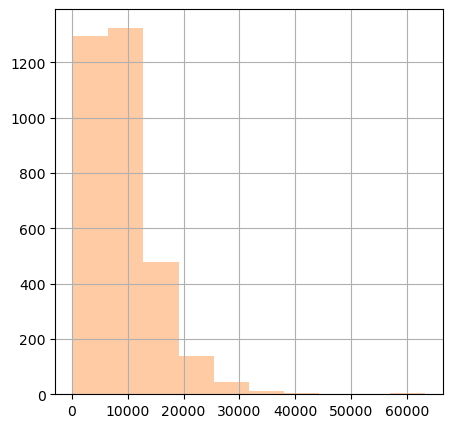

In [13]:
#타겟 데이터 히스토그램 그려보기
pre_u2_df['target'].hist(figsize=(5,5), color='#FFCBA4')

In [14]:
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
features, targets = pre_u2_df.iloc[:, :-1], pre_u2_df.iloc[:, -1]

# 문제/정답 및 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

In [15]:
# 학습 및 테스트 데이터로 병합
train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [16]:
from sklearn.decomposition import PCA

# 차원 축소 객체 생성
pca = PCA(n_components=5)

# 타겟을 제외하고 피처만 차원 축소
pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.fit_transform(test_df.iloc[:, :-1])

# 크기 확인
print(pca_train.shape, pca_test.shape)

(2643, 5) (661, 5)


In [17]:
# 컬럼명 설정
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]

# 차원 축소 데이터 프레임 생성
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
# 타겟 데이터 추가
pca_train_df.loc[:, 'target'] = train_df['target']

# 컬럼명 설정
pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]

# 차원 축소 데이터 프레임 생성
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
# 타겟 데이터 추가
pca_test_df.loc[:, 'target'] = test_df['target']

In [18]:
# 보존률 확인하기
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.32832644 0.20796199 0.02774843 0.01830581 0.01266672]
0.595009386196383


In [19]:
pca_train_df

,pca1,pca2,pca3,pca4,pca5,target
0,-97932.783231,-6206.367702,-15138.824027,616.765003,412.758836,6780.174
1,-22251.144854,-48116.476809,29897.574610,-3279.606482,3320.628520,13275.861
2,-45220.657155,106673.421846,-49560.223358,-1403.469341,1934.839684,6177.806
3,-20539.696988,72515.807052,-17095.198174,-227.001328,1034.817359,12011.212
4,60055.969624,-104524.776317,-9357.394233,5933.596523,-5264.730836,4454.996
...,...,...,...,...,...,...
2638,192322.341859,-35143.144969,-2038.305682,16241.107225,11328.976536,3038.000
2639,-52650.803002,-62477.269877,-16181.503541,3081.927986,-3592.457765,4205.684
2640,-68144.991066,146350.743024,-53120.881268,-822.300242,-276.413047,4811.961
2641,-30970.497478,-7230.338708,63294.388580,-5138.375576,864.447954,24332.636


In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
features, targets = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]

# 학습/테스트 및 문제/정답 데이터 세트 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()
# 훈련
l_r.fit(X_train, y_train)

LinearRegression()

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [22]:
# 예측
prediction = l_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 3874387.9403, RMSE: 1968.3465, MSLE: 0.0627, RMSLE: 0.2504, R2: 0.9018


In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# 데이터 세트 분리
features, targets = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]

# 차수 확장
poly_features = PolynomialFeatures(degree=2).fit_transform(features)

# 학습/테스트 및 문제/정답 데이터 세트 분리
X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()
# 훈련
l_r.fit(X_train, y_train)

LinearRegression()

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
      .format(MSE, RMSE, R2))

In [26]:
# 예측
prediction = l_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 3787264.5621, RMSE: 1946.0896, R2: 0.9040


### **📝1Cycle 결과**
>   
>   

In [ ]:
# 문자열 데이터를 제외하고 차원축소함